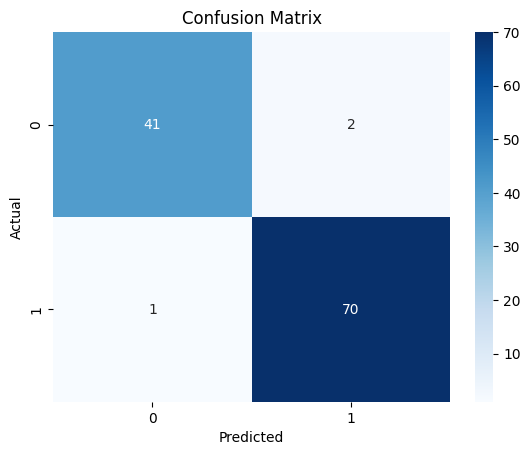

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



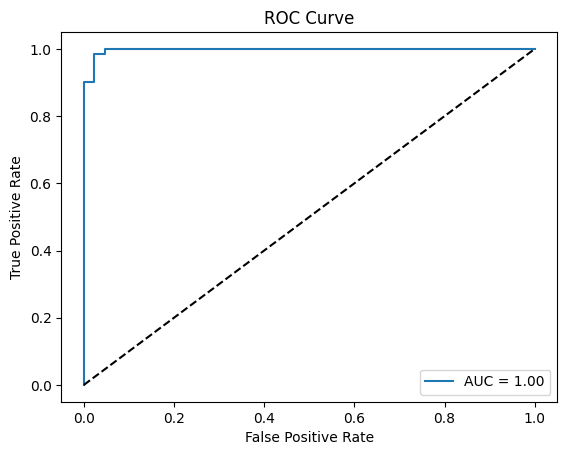

In [1]:
# ✅ Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 2: Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# ✅ Step 3: Train/test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Step 4: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# ✅ Step 5: Make predictions and evaluate
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### **🔍 Threshold Tuning and Sigmoid Function Explanation**


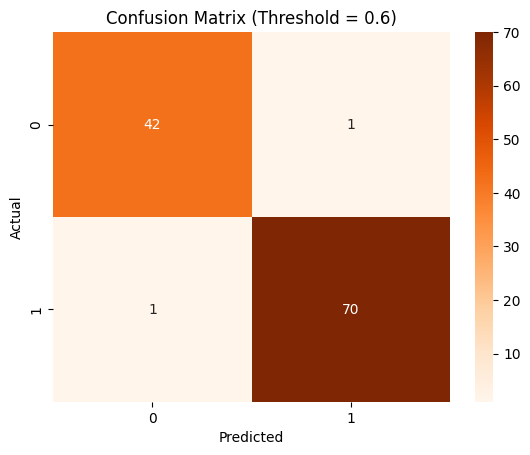

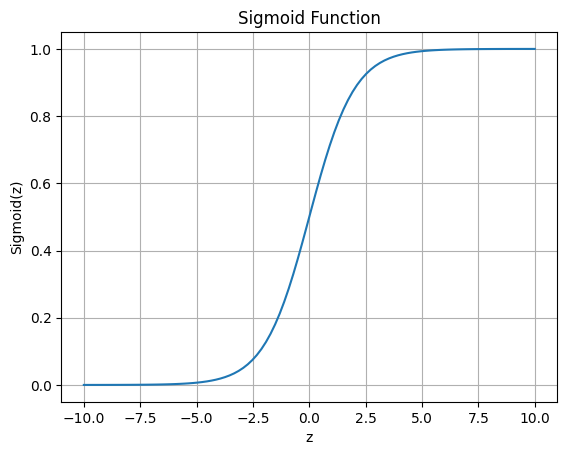

In [2]:
# ✅ Custom threshold tuning
custom_threshold = 0.6
y_custom_pred = (y_proba >= custom_threshold).astype(int)

# Confusion matrix with new threshold
cm_custom = confusion_matrix(y_test, y_custom_pred)
sns.heatmap(cm_custom, annot=True, fmt="d", cmap="Oranges")
plt.title(f"Confusion Matrix (Threshold = {custom_threshold})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plotting sigmoid
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid()
plt.show()


1. **How does logistic regression differ from linear regression?**  
   - Linear regression predicts continuous values; logistic regression predicts probabilities and is used for classification. Logistic regression uses the **sigmoid function** to convert outputs into probabilities.

2. **What is the sigmoid function?**  
   - A function: `σ(z) = 1 / (1 + e^(-z))`. It maps any real number into the range (0, 1), useful for binary classification.

3. **What is precision vs recall?**  
   - **Precision** = TP / (TP + FP) → How many predicted positives are actually positive.  
   - **Recall** = TP / (TP + FN) → How many actual positives were correctly predicted.

4. **What is the ROC-AUC curve?**  
   - A plot of TPR vs FPR at various thresholds. AUC (Area Under Curve) measures model's ability to distinguish classes.

5. **What is the confusion matrix?**  
   - A 2x2 table showing TP, TN, FP, FN which helps evaluate model performance on classification tasks.

6. **What happens if classes are imbalanced?**  
   - Metrics like accuracy can be misleading. Use precision, recall, F1-score, or AUC. Consider resampling or using class weights.

7. **How do you choose the threshold?**  
   - Depends on problem: high recall for disease detection, high precision for spam detection. Tune based on ROC or precision-recall curves.

8. **Can logistic regression be used for multi-class problems?**  
   - Yes, using **one-vs-rest (OvR)** or **multinomial (softmax)** strategies via `LogisticRegression(multi_class='multinomial')`.
